In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def volume_curve(path, i, limit_elevation=1000, req_volume=311):
    df = pd.read_csv(f'..//Data//volumecurve{i}.csv')
    df['Volume (hm³)'] = df['Volume (m³)'] / 1e6  # Convert to hm³
    df = df[df['Elevation (m)'] < 1000]
    # display(df.head())

    req_elevat = df[df['Volume (hm³)'] >= req_volume]['Elevation (m)'].min()
    area = df[df['Elevation (m)'] == req_elevat]['Area (m²)'].values[0]
    req_height = req_elevat - df['Elevation (m)'].min()

    fig, ax1 = plt.subplots(figsize=(10, 5))
    ax1.plot(df['Elevation (m)'], df['Volume (hm³)'], 'b-', label='Volume Curve')  # Add points
    ax1.set_xlabel('Elevation (m)')
    ax1.set_ylabel('Volume (hm³)')

    ax2 = ax1.twinx()
    ax2.plot(df['Elevation (m)'], df['Area (m²)'], 'r-', label='Area Curve')  # Add points
    ax2.set_ylabel('Area (m²)')
    ax2.invert_yaxis()

    ax1.set_title(f'Volume Curve, location {i}')
    ax1.grid()
    ax1.legend(loc = 'upper right')
    ax2.legend(loc = 'upper left')
    ax1.axhline(req_volume, color='gray', linestyle='--')
    ax1.axvline(req_elevat, color='gray', linestyle='--')
    ax1.set_xlim(df['Elevation (m)'].min(), limit_elevation)

    ax1.annotate(f'Required Elevation: {req_elevat:.2f} m',
                 xy=(df[df['Volume (hm³)'] >= req_volume]['Elevation (m)'].min(), req_volume),
                 xytext=(df[df['Volume (hm³)'] >= req_volume]['Elevation (m)'].min()+20, req_volume+10),
                 backgroundcolor='white',
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=10,
                 color='black')

    ax1.annotate(f'Required Volume: {req_volume:.0f} hm³',
                 xy=(req_elevat+30, req_volume + 50),
                 xytext=(df['Elevation (m)'].min()+5, req_volume + 50),
                 fontsize=10,
                 color='black')
    
    ax2.annotate(f'Area: {area:.2e} m²',
                 xy=(req_elevat, area),
                 xytext=(req_elevat+20, area+1e6),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 backgroundcolor='white',
                 fontsize=10,
                 color='black')

    plt.savefig("..//figures//volumecurve" + f"{i}.png")

    return req_elevat, area, req_height

,Required Elevation (m),Required Area (m²),Required Height (m)
1,780.396729,5.838928e+06,205.0
2,617.500000,7.222392e+06,150.0
3,575.000000,7.952364e+06,134.0
4,537.500000,8.801307e+06,121.0
5,516.000000,8.954270e+06,115.0


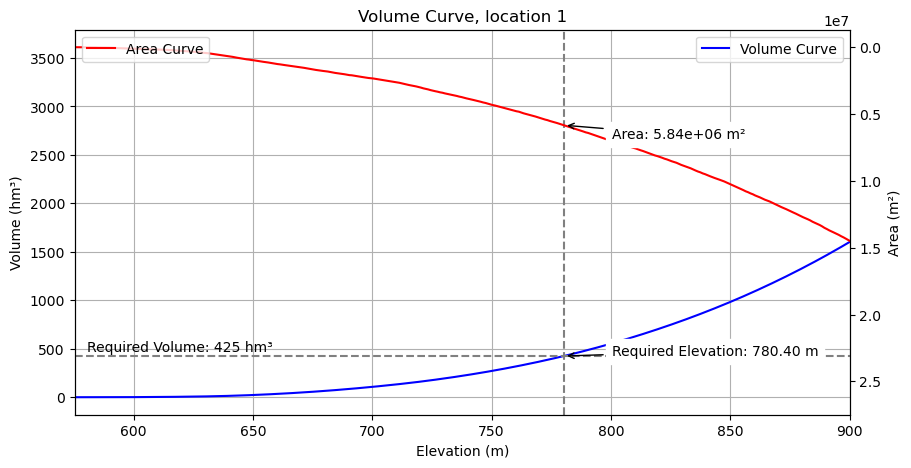

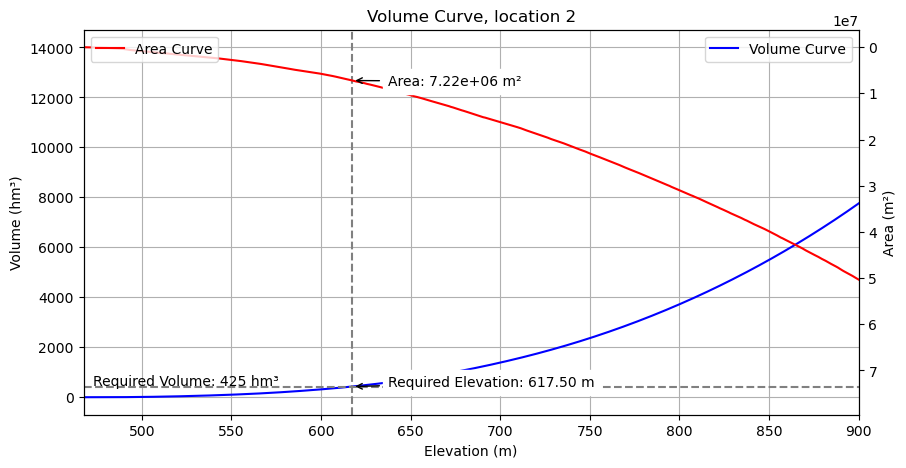

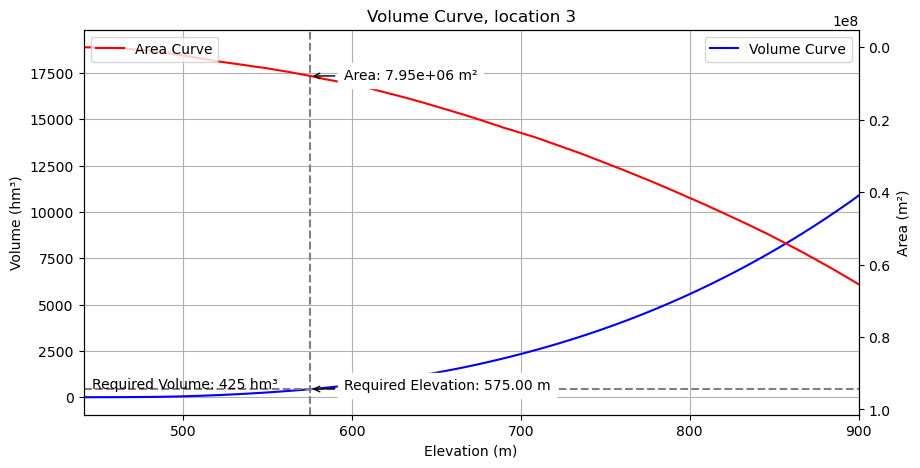

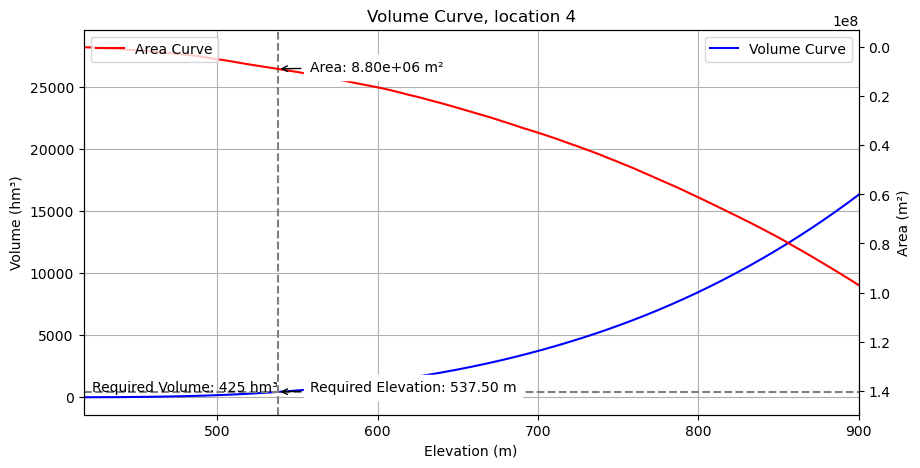

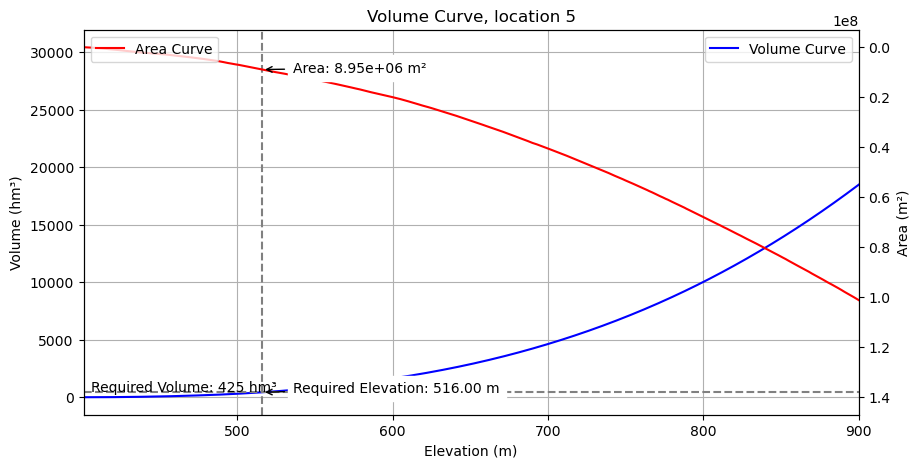

In [3]:
req_volume = 425  # in hm³

elevations = []
areas = []
heights = []
location_ids = []

for i in range(1, 6):
    elev, area, height = volume_curve('volume_curve_data.csv', i, limit_elevation=900, req_volume=req_volume)
    location_ids.append(i)
    elevations.append(elev)
    areas.append(area)
    heights.append(height)

df_loc = pd.DataFrame(index=location_ids, data={
    'Required Elevation (m)': elevations,
    'Required Area (m²)': areas,
    'Required Height (m)': heights
})

display(df_loc)